# Data Modeling

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("winequality-red-white.csv")
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [3]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'class'],
      dtype='object')

## Classification model


Features
* Fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioide
* density
* pH
* Sulphates
* alcohol

Target
* class: **0 : "red-wine", 1 : "white-wine"**

Algorithms (Supervised Learning)
1. K Nearest Neighbors
2. Logistic Regression
3. Decision tree
4. Support Vector Machine

**Data preprocessing**


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Verify if all the data types are in the correct form

In [5]:
df.dtypes

Unnamed: 0                int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
class                     int64
dtype: object

In [6]:
df["class"].value_counts()

1    4898
0    1599
Name: class, dtype: int64

In [11]:
X = np.asanyarray(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
y = np.asanyarray(df["class"])

print("features: \n", X[0:5])
print("target: \n", y[0:5])

features: 
 [[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]]
target: 
 [0 0 0 0 0]


*Normalize the data*

In [12]:
standard = StandardScaler()

In [13]:
X_standard = standard.fit_transform(X)
print("Standard Features: \n", X_standard[0:5])

Standard Features: 
 [[ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.56995782 -1.10013986
  -1.44635852  1.03499282  1.81308951  0.19309677 -0.91546416]
 [ 0.45103572  3.28223494 -2.19283252 -0.59764007  1.1979747  -0.31132009
  -0.86246863  0.70148631 -0.11507303  0.99957862 -0.58006813]
 [ 0.45103572  2.55330026 -1.91755268 -0.66069923  1.02669737 -0.87476278
  -1.09248586  0.76818761  0.25811972  0.79795816 -0.58006813]
 [ 3.07381662 -0.36243847  1.66108525 -0.7447781   0.54141159 -0.76207424
  -0.98632406  1.10169412 -0.3638682   0.32751041 -0.58006813]
 [ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.56995782 -1.10013986
  -1.44635852  1.03499282  1.81308951  0.19309677 -0.91546416]]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 4)

print("The shape of the training dataset: {}".format(X_train.shape[0]))
print("The shape of the test dataset: {}".format(X_test.shape[0]))

The shape of the training dataset: 4547
The shape of the test dataset: 1950


### 1. K Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

Let's try the algorithm with *k = 2* because we have two classes {0, 1}

In [18]:
k = 2
knn = KNeighborsClassifier(n_neighbors = k)
knn

KNeighborsClassifier(n_neighbors=2)

train the algorithm and predict the labels

In [19]:
#train
knn.fit(X_train, y_train)

#Predict
y_hat_knn = knn.predict(X_test)

print("the original values:  {}".format(y_test[0:5]))
print("the predicted values: {}".format(y_hat_knn[0:5]))

the original values:  [1 0 1 1 0]
the predicted values: [1 0 1 1 0]


**Accuracy evaluation**

In [20]:
from sklearn import metrics

In [21]:
print("Train set accuracy: {}".format(metrics.accuracy_score(y_train, knn.predict(X_train))))
print("Test set accuracy:  {}".format(metrics.accuracy_score(y_test, y_hat_knn)))

Train set accuracy: 0.9973608972949197
Test set accuracy:  0.9912820512820513


### 2. Logistic Regression


The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. C parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization. Now let's fit our model with train set:

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression(C = 0.01, solver = "liblinear")
lr

LogisticRegression(C=0.01, solver='liblinear')

Train the model and predict the target

In [24]:
#train
lr.fit(X_train, y_train)

#Predict
y_hat_lr = lr.predict(X_test)

print("The original values:  {}".format(y_test[0:5]))
print("The predicted values: {}".format(y_hat_lr[0:5]))

The original values:  [1 0 1 1 0]
The predicted values: [1 0 1 1 0]


**predict_proba** returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, $P(Y=1|X)$:

In [25]:
y_hat_prob = lr.predict_proba(X_test)

print("The original values:  {}".format(y_test[0:5]))
print("The probability of predicted target: \nP(y = 0 | x)  P(y = 1 | x) \n{} ".format(y_hat_prob[0:5]))

The original values:  [1 0 1 1 0]
The probability of predicted target: 
P(y = 0 | x)  P(y = 1 | x) 
[[2.31431908e-02 9.76856809e-01]
 [9.99196042e-01 8.03957759e-04]
 [3.48490649e-02 9.65150935e-01]
 [1.87951831e-01 8.12048169e-01]
 [7.20583002e-01 2.79416998e-01]] 


**Accuracy evaluation**

In [30]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

In [28]:
idx_jaccard = jaccard_score(y_test, y_hat_lr, pos_label = 0)
print("The jaccard index values is: {}".format(idx_jaccard))

The jaccard index values is: 0.963855421686747


In [31]:
acc_log_los = log_loss(y_test, y_hat_prob)
print("the logarithmic loss: {}".format(acc_log_los))

the logarithmic loss: 0.0956237200180999


### 3. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=5)

train the model and predict target

In [46]:
dt.fit(X_train, y_train)

y_hat_dt = dt.predict(X_test)

print("the original values:  {}".format(y_test[0:5]))
print("The predicte values:  {}".format(y_hat_dt[0:5]))

the original values:  [1 0 1 1 0]
The predicte values:  [1 0 1 1 0]


In [47]:
print("Decision Tree's Accuracy: {}".format(metrics.accuracy_score(y_test, y_hat_dt)))

Decision Tree's Accuracy: 0.9830769230769231


**Visualization Decision tree**

In [40]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline 

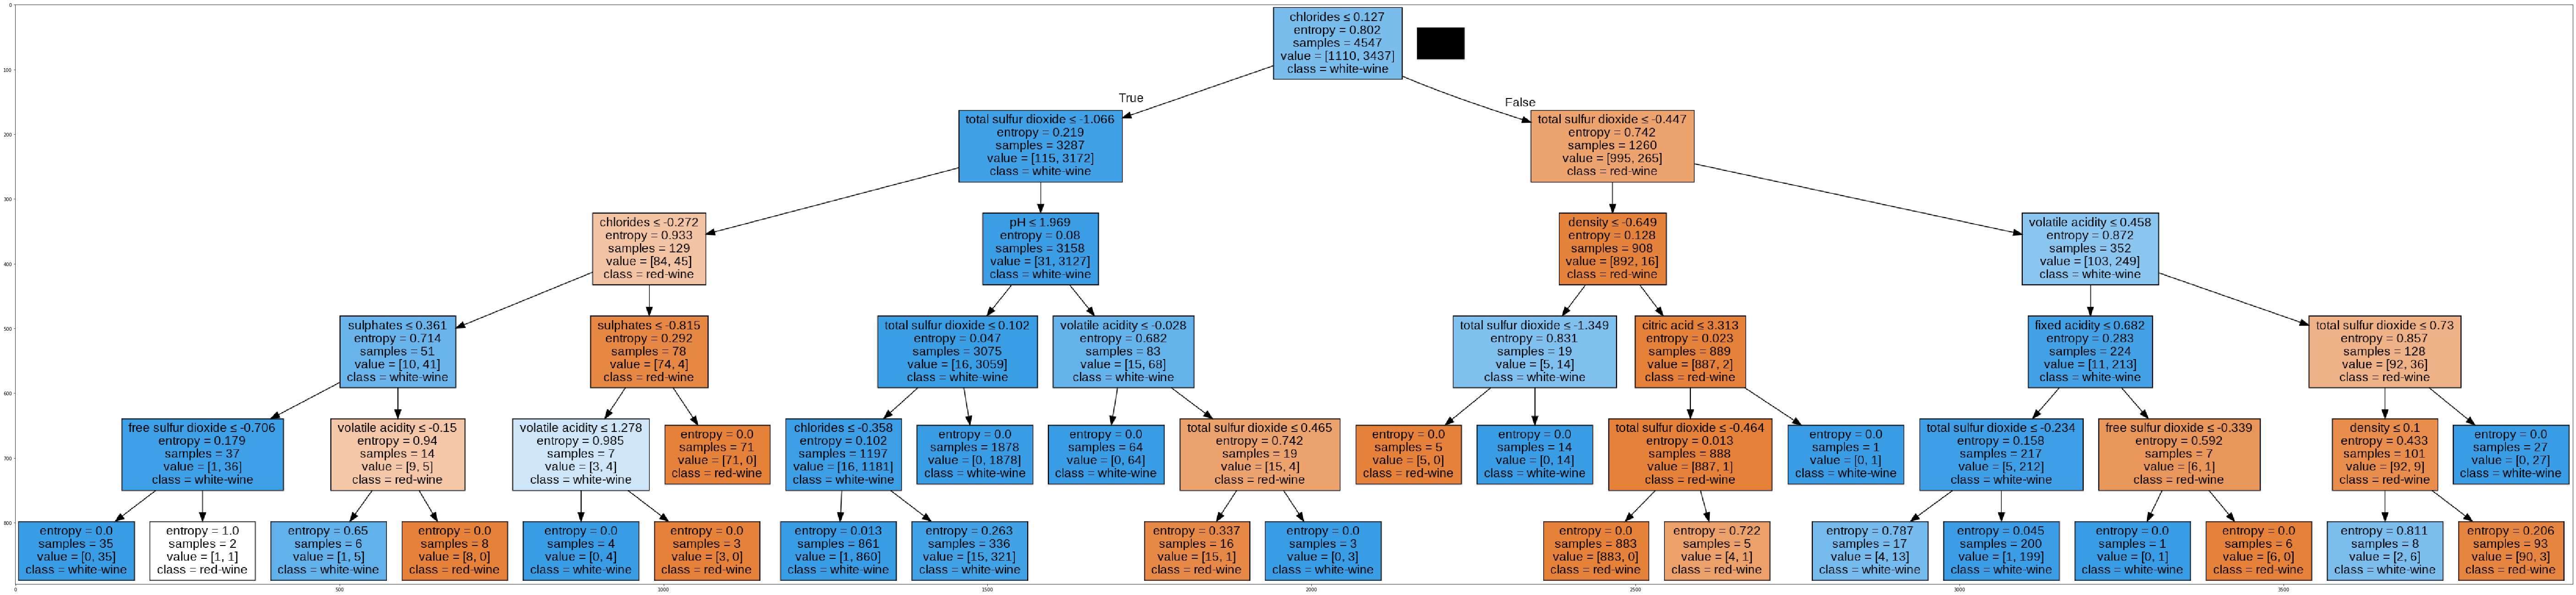

In [41]:
dot_data = StringIO()
filename = "wine_tree.png"
featureNames = df.columns[1:12]
out = tree.export_graphviz(dt, feature_names = featureNames, out_file = dot_data, class_names = ["red-wine", "white-wine"], filled = True,  
                         special_characters = True, rotate = False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### 4. Support Vector Machines

In [49]:
from sklearn import svm

In [50]:
clf = svm.SVC(kernel = "rbf")

In [51]:
#train
clf.fit(X_train, y_train)

#Predict
y_hat_clf = clf.predict(X_test)

print("the original values: {}".format(y_test[0:5]))
print("the predicted values: {}".format(y_hat_clf[0:5]))

the original values: [1 0 1 1 0]
the predicted values: [1 0 1 1 0]


**Evaluation**

In [54]:
from sklearn.metrics import f1_score

In [58]:
print("The accuracy f1 score: {}".format(f1_score(y_test, y_hat_dt, average = "weighted")))
print("the accuracy jaccard score: {}".format(jaccard_score(y_test, y_hat_dt, pos_label = 0)))

The accuracy f1 score: 0.9830243151425389
the accuracy jaccard score: 0.9341317365269461


**Confusion matrix for all the algorithms**

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Confusion matrix K Nearest Neighbors**

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       489
           1       1.00      0.99      0.99      1461

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

Confusion matrix, without normalization
[[ 482    7]
 [  10 1451]]


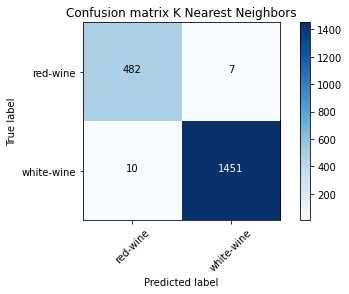

In [61]:
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(y_test, y_hat_knn, labels = [0, 1])
np.set_printoptions(precision = 2)

print (classification_report(y_test, y_hat_knn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes = ['red-wine','white-wine'],normalize = False,  title = 'Confusion matrix K Nearest Neighbors')

**Confusion Matrix Logistic Regression**

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       489
           1       0.99      0.99      0.99      1461

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

Confusion matrix, without normalization
[[ 480    9]
 [   9 1452]]


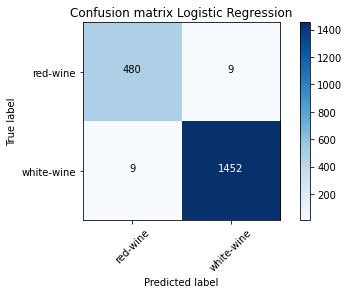

In [63]:
# Compute confusion matrix
cnf_matrix_lr = confusion_matrix(y_test, y_hat_lr, labels = [0, 1])
np.set_printoptions(precision = 2)

print(classification_report(y_test, y_hat_lr))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes = ['red-wine','white-wine'], normalize = False,  title = 'Confusion matrix Logistic Regression')

**Confusion Matrix Decision Tree**

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       489
           1       0.99      0.99      0.99      1461

    accuracy                           0.98      1950
   macro avg       0.98      0.97      0.98      1950
weighted avg       0.98      0.98      0.98      1950

Confusion matrix, without normalization
[[ 468   21]
 [  12 1449]]


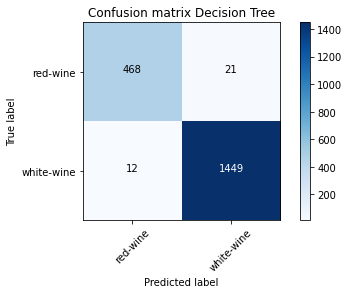

In [64]:
# Compute confusion matrix
cnf_matrix_dt = confusion_matrix(y_test, y_hat_dt, labels = [0, 1])
np.set_printoptions(precision = 2)

print(classification_report(y_test, y_hat_dt))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_dt, classes = ['red-wine','white-wine'],normalize = False,  title = 'Confusion matrix Decision Tree')

**Confusion Matrix Support Vecto Machine**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       489
           1       0.99      1.00      1.00      1461

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

Confusion matrix, without normalization
[[ 479   10]
 [   2 1459]]


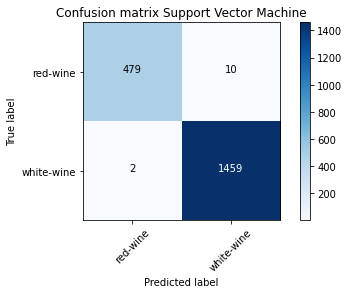

In [65]:
# Compute confusion matrix
cnf_matrix_clf = confusion_matrix(y_test, y_hat_clf, labels=[0, 1])
np.set_printoptions(precision=2)

print(classification_report(y_test, y_hat_clf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_clf, classes=['red-wine','white-wine'], normalize= False,  title='Confusion matrix Support Vector Machine')